In [13]:
import os
#os.environ['KERAS_BACKEND'] = 'theano'   
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
try:
    from ai4neb import manage_RM
except:
    !pip install -U git+https://github.com/morisset/AI4neb.git
    from ai4neb import manage_RM  
print(manage_RM().RM_version)
%matplotlib inline

0.17


In [2]:
# Needs an existing "data" dir, or whatever you want the directory to be named: 
data_dir = 'CSVs/'

In [3]:
def load_from_3mdb(data_file):
    """
    This function is used to download the data from 3MdB. They are stored in data_dir + data_file.
    It needs to be run once.
    """
    db = pymysql.connect(host=os.environ['MdB_HOST'], 
                                user=os.environ['MdB_USER'], 
                                passwd=os.environ['MdB_PASSWD'], 
                                db=os.environ['MdB_DBp'])    
        
    sel="""SELECT 
        O__3__5007A/TOTL__3727A  as o32,
        O__3__5007A/(O__3__5007A + TOTL__3727A)  as o3o2,
        HE_1__5876A/H__1__4861A as he1, 
        HE_2__4686A/H__1__4861A as he2,
        TOTL__4363A/O__3__5007A as ro3,
        N__2__5755A/N__2__6584A as rn2,
        atm1 as Teff,
        OXYGEN,
        MassFrac,
        logU_mean as logU,
        A_HELIUM_vol_1 as ahe1, A_HELIUM_vol_2 as ahe2,
        A_HELIUM_vol_2 / (A_HELIUM_vol_1 + A_HELIUM_vol_2) as ahe21,
        log10(A_HELIUM_vol_2 / (A_HELIUM_vol_1 + A_HELIUM_vol_2)) as lahe21,
        A_OXYGEN_vol_2 / (A_OXYGEN_vol_1 + A_OXYGEN_vol_2) as ao21,
        A_CARBON_vol_2 as ac2,
        A_NITROGEN_vol_1 as an1,
        A_OXYGEN_vol_1 as ao1, A_OXYGEN_vol_2 as ao2,
        A_NEON_vol_2 as ane2, A_NEON_vol_3 as ane3, A_NEON_vol_4 as ane4,
        A_ARGON_vol_2 as aar2,A_ARGON_vol_3 as aar3,A_ARGON_vol_4 as aar4,
        A_SULPHUR_vol_1 as as1, A_SULPHUR_vol_2 as as2,
        A_CHLORINE_vol_2 as acl2,
        A_SODIUM_vol_2 as ana2, A_SODIUM_vol_3 as ana3,
        A_POTASSIUM_vol_3 as ak3,
        A_CALCIUM_vol_1 as aca1, A_CALCIUM_vol_4 as aca4
        FROM tab, abion
        WHERE tab.N=abion.N
#              AND (tab.ref = 'PNe_2014_c13' or tab.ref = "PNe_2016") AND C_version = "13.03" 
              AND com6 = 1 
#              AND com1 = "BB" and com2 = "C" and com4 = "S" and com5 = "N" 
              AND MassFrac > 0.7
        """
#        WHERE tab.N=abion.N AND tab.ref like 'PNe_2014' AND com6 = 1 and com1 = "BB" and com2 = "C" and com4 = "S" and com5 = "N" and MassFrac > 0.7"""
    data = pd.read_sql(sel, con=db)    
    db.close()
    data.to_csv(data_dir + data_file)
    print('length: ', len(data))
# Uncomment the following to run it ONCE:
#data_file = '3mdb_ICF.dat'
#load_from_3mdb(data_file=data_file)

In [4]:
#data_file = '3mdb_ICF_c13.dat'
data_file = '3mdb_ICF.dat'
data = pd.read_csv(data_dir + data_file)
print(len(data))
data['as21'] = data['as2'] / data['as1']

44534


In [5]:
data

Unnamed: 0         o32      o3o2       he1           he2       ro3  \
0               0    0.031666  0.030694  0.026504  1.865411e-07  0.001112   
1               1    4.215397  0.808260  0.113802  3.891104e-01  0.011413   
2               2    4.835602  0.828638  0.108351  4.055336e-01  0.011416   
3               3    3.133666  0.758084  0.089256  5.371577e-01  0.012650   
4               4    3.133816  0.758093  0.088855  5.383425e-01  0.012650   
...           ...         ...       ...       ...           ...       ...   
44529       44529  261.308961  0.996188  0.093879  5.759941e-01  0.014892   
44530       44530    2.557890  0.718935  0.102336  4.452162e-01  0.011339   
44531       44531    2.558560  0.718987  0.101834  4.461820e-01  0.011339   
44532       44532   16.079509  0.941450  0.168405  7.066417e-03  0.005255   
44533       44533   60.152555  0.983647  0.168002  8.317380e-03  0.004847   

            rn2      Teff  OXYGEN  MassFrac  ...          aar4       as1  \
0      0.003839   25000.0   -3.36  1.000000  ...  4.813223e-14  0.481717   
1      0.020668  150000.0   -3.36  1.000000  ...  9.850296e-02  0.146877   
2      0.021711  150000.0   -3.36  0.795080  ...  1.057821e-01  0.099599   
3      0.019513  180000.0   -3.36  1.000000  ...  1.212806e-01  0.167755   
4      0.019516  180000.0   -3.36  0.795525  ...  1.229175e-01  0.158054   
...         ...       ...     ...       ...  ...           ...       ...   
44529  0.053883  170000.0   -3.36  0.793660  ...  2.593792e-01  0.006002   
44530  0.018692  160000.0   -3.36  1.000000  ...  8.032503e-02  0.196285   
44531  0.018702  160000.0   -3.36  0.798208  ...  8.146555e-02  0.185804   
44532  0.022001   60000.0   -3.36  1.000000  ...  2.046575e-03  0.045317   
44533  0.020641   60000.0   -3.36  0.798000  ...  2.481058e-03  0.011875   

            as2      acl2       ana2       ana3        ak3       aca1  \
0      0.517997  0.349214 -40.000000 -40.000000 -40.000000 -40.000000   
1      0.499454  0.488366 -40.000000 -40.000000 -40.000000 -40.000000   
2      0.520723  0.502559 -40.000000 -40.000000 -40.000000 -40.000000   
3      0.466016  0.446993 -40.000000 -40.000000 -40.000000 -40.000000   
4      0.470782  0.451866 -40.000000 -40.000000 -40.000000 -40.000000   
...         ...       ...        ...        ...        ...        ...   
44529  0.194918  0.177560   0.410863   0.237264   0.280897   0.001685   
44530  0.514218  0.502751   0.633448   0.215974   0.140387   0.075065   
44531  0.520599  0.508833   0.637918   0.219040   0.142380   0.073549   
44532  0.641734  0.679399   0.709956   0.003840   0.103266   0.017422   
44533  0.615735  0.664037   0.768212   0.004656   0.124362   0.011484   

            aca4       as21  
0     -40.000000   1.075314  
1     -40.000000   3.400486  
2     -40.000000   5.228175  
3     -40.000000   2.777956  
4     -40.000000   2.978605  
...          ...        ...  
44529   0.187224  32.476736  
44530   0.074406   2.619753  
44531   0.075462   2.801873  
44532   0.000680  14.160870  
44533   0.000825  51.852039  

[44534 rows x 35 columns]

In [6]:
def load_ICF(data_file=data_file, ref_lines = 'o32he1he2_3', ICF = 'N+/O+'):
    """
    This functions returns X_train and y_train extracted from the datafile.
    ref_lines tells what lines are to be used.
    ICF tells what ICF to compute.
    """
    data = pd.read_csv(data_dir + data_file)
    data['as21'] = data['as2'] / data['as1']
    if ref_lines == 'o32he1he2_3':
        to_train = ['o32', 'he1', 'he2']
    elif ref_lines == 'o32he1he2rO3_4':
        to_train = ['o32', 'he1', 'he2', 'ro3']
    elif ref_lines == 'o32he1he2rN2_4':
        to_train = ['o32', 'he1', 'he2', 'rn2']
    elif ref_lines == 'o32he1he2rO3rN2_5':
        to_train = ['o32', 'he1', 'he2', 'ro3', 'rn2']
    elif ref_lines == 'ao21lahe21':
        to_train = ['ao21', 'lahe21']
    elif ref_lines == 'ao21ahe21':
        to_train = ['ao21', 'ahe21']
    elif ref_lines == 'ao21lahe21as21':
        to_train = ['ao21', 'lahe21', 'as21']
    else:
        raise ValueError('Unknown ref_lines value: {}'.format(ref_lines))
    X_train = np.array(data[to_train])
    
    y_train = None
    if ICF == 'N+/O+':
        to_predict = ['ao1', 'an1']
    elif ICF == 'Ne++/O++':    
        to_predict = ['ao2', 'ane2']
    elif ICF == 'S+/O+':
        to_predict = ['ao1', 'as1']
    elif ICF == '(S+ + S++)/O+':
        to_predict = ['ao1', 'as1', 'as2']
        selection = np.array(data[to_predict])
        y_train = np.log10(selection[:,0] / (selection[:,1] + selection[:,2]))
    elif ICF == 'Ne++ + Ne+4':
        to_predict = ['ane2', 'ane4']
        selection = np.array(data[to_predict])
        y_train = np.log10(1./(selection[:,0] + selection[:,1]))
    elif ICF == 'C++/O++':
        to_predict = ['ao2', 'ac2']
    elif ICF == 'Cl++/O+':
        to_predict = ['ao1', 'acl2']
    elif ICF == 'Ar++/(O+ + O++)':
        to_predict = ['ao1', 'ao2', 'aar2']
        selection = np.array(data[to_predict])
        y_train = np.log10((selection[:,0] + selection[:,1])/selection[:,2])        
    elif ICF == 'Na++/(O+ + O++)':
        to_predict = ['ao1', 'ao2', 'ana2']
        selection = np.array(data[to_predict])
        y_train = np.log10((selection[:,0] + selection[:,1])/selection[:,2])
    elif ICF == 'Na++/O++':    
        to_predict = ['ao2', 'ana2']
    elif ICF == 'Na++/O+':    
        to_predict = ['ao1', 'ana2']
    elif ICF == 'Na3+/O++':    
        to_predict = ['ao2', 'ana3']
    elif ICF == 'K3+/Ar3+':    
        to_predict = ['aar3', 'ak3']
    else:
        raise ValueError('Unknown ICF value: {}'.format(ICF))
    if y_train is None:
        selection = np.array(data[to_predict])
        y_train = np.log10(selection[:,0] / selection[:,1])
    mask_X = np.isfinite(X_train.sum(1))
    mask_y = np.isfinite(y_train)
    return X_train[mask_X & mask_y], y_train[mask_X & mask_y]

In [7]:
def train_ICF(ref_lines, ICF, RM_type='SK_ANN', split_ratio=0.5, scaling=True, use_log=True, 
              y_vects=None, reduce_by=None, noise=None, random_seed=10, data_file=data_file, **kwargs):
    """
    This function instantiates a manage_RM object, initiates the Neural Network, trains it and computes the predictions.
    """
    # Load the 3MdB models.
    X_train, y_train = load_ICF(data_file=data_file, ref_lines = ref_lines, 
                                ICF = ICF)
    # Instantiate the object to manage the Regressor Model
    # The training and testing sets will be obtained from splitting X_train and y_train
    #print('min and max X_train', np.min(X_train, axis=0), np.max(X_train, axis=0))
    RM = manage_RM(RM_type=RM_type,
                      X_train=X_train, y_train=y_train, 
                      scaling=scaling, use_log=use_log, split_ratio=split_ratio,
                      verbose=True, scaling_y=False, 
                      y_vects=y_vects,
                      clear_session=True,
                      random_seed=random_seed)
    # Initialize the model
    RM.init_RM(**kwargs)
    RM.train_RM()
    RM.predict(scoring=False, reduce_by=reduce_by)
    RM.ref_lines = ref_lines
    RM.ICF = ICF
    return RM

In [8]:
def plot_ICF(RM, ylim=(-0.5, 0.5), filename=None):
    x = RM.X_test[:,0] # [OIII] / [OII]
    c = RM.X_test[:,2] # HeII / Hb
    if np.ndim(RM.pred) == 2:
        preds = RM.pred[:,0]
    else:
        preds = RM.pred
    if np.ndim(RM.y_test) == 2:
        oris = RM.y_test[:,0]
    else:
        oris = RM.y_test
    
    f, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
   
    f.subplots_adjust(hspace=0.001)
    f.subplots_adjust(wspace=0.001)
    alpha = 1.
    sc1 = ax1.scatter(x, oris, alpha=alpha,  c=c, vmin=-1)
    
    ax1.set_xlim((-4.5, 2.5))
    ax1.set_ylim(ylim)
    ax1.set_ylabel('log ICF({}) original'.format(RM.ICF))
    
    ax2.scatter(x, preds, alpha=alpha, c=c, vmin=-1)
    ax2.set_ylim(ylim)
    ax2.set_ylabel('log ICF({}) prediction'.format(RM.ICF))
    ax2.set_xlabel('log [OIII] / [OII]')

    ax3.scatter(x, (10**preds-10**oris)/10**oris, marker='*', alpha=alpha,  c=c, vmin=-1)
    ax3.set_ylim((-1.5, 1.5))
    ax3.set_ylabel(r'$\Delta$/ICF({})'.format(RM.ICF))
    ax3.yaxis.tick_right()
    ax3.yaxis.set_label_position("right")
    
    ax4.scatter(x, (preds-oris), marker='*', alpha=alpha, c=c, vmin=-1)
    ax4.set_ylim((-.5, .5))
    ax4.set_ylabel(r'$\Delta$ [dex]'.format(RM.ICF))
    ax4.set_xlabel('log [OIII] / [OII]')
    ax4.yaxis.tick_right()
    ax4.yaxis.set_label_position("right")
    
    if filename is not None:
        f.safefig(filename)

In [9]:
def plot_aICF(RM, ylim=(-0.5, 0.5), xaxis='He', dylim=(-.2, .2), filename=None):
    cmap = 'gnuplot2_r'
    v = RM.X_test_unscaled[:,1] # He++ / (He+ + He++)
    w = RM.X_test_unscaled[:,0] # O++ / (O+ + O++)
    if xaxis == 'He':
        x =  v
        c =  w
        xlabel = 'He++ / (He+ + He++)'
    else:
        c = v
        x = w
        xlabel = 'O++ / (O+ + O++)'
    if np.ndim(RM.pred) == 2:
        preds = RM.pred[:,0]
    else:
        preds = RM.pred
    if np.ndim(RM.y_test) == 2:
        oris = RM.y_test_ori[:,0]
    else:
        oris = RM.y_test_ori
    #print('min and max X_test', np.min(x), np.min(c), np.max(x), np.max(c))
    f, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
    
    alpha = 1.0
    f.subplots_adjust(hspace=0.001)
    f.subplots_adjust(wspace=0.001)
    print(x.shape, oris.shape, c.shape)
    sc1 = ax1.scatter(x, oris, alpha=alpha, c=c, cmap=cmap)
    
    ax1.set_xlim((-0.1, 1.1))
    ax1.set_ylim(ylim)
    ax1.set_ylabel('log ICF({}) original'.format(RM.ICF))
    
    #alpha = np.max(RM.pred_norm, 1)
    ax2.scatter(x, preds, alpha=alpha, c=c, cmap=cmap)
    ax2.set_ylim(ylim)
    ax2.set_ylabel('log ICF({}) prediction'.format(RM.ICF))
    
    ax2.set_xlabel(xlabel)

    
    #cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
    #f.colorbar(sc1, cax=cbar_ax)
    if RM.ICF == 'N+/O+':
        mask = w < 0.95
        score = np.sqrt(((preds-oris)[mask]**2).sum() / mask.sum())
        DIMS = -0.16 * w * ( 1 + v)
        score2 = np.sqrt(((DIMS-oris)[mask]**2).sum() / mask.sum())
        print('SCORES = ANN: {:.2e}, DIMS: {:.2e}'.format(score, score2))
        
        ax3.scatter(x, 100*(10**oris-10**DIMS)/10**oris, marker='*', alpha=alpha, c=c, cmap=cmap)
        ax3.set_ylim(dylim)
        ax3.set_ylabel(r'$\Delta$ ICF [%] (DIMS)'.format(RM.ICF))
        ax3.yaxis.tick_right()
        ax3.yaxis.set_label_position("right")

        ax4.scatter(x, 100*(10**oris-10**preds)/10**oris, marker='*', alpha=alpha, c=c, cmap=cmap)
        ax4.set_ylim(dylim)
        ax4.set_ylabel(r'$\Delta$ ICF [%]'.format(RM.ICF))
        ax4.set_xlabel(xlabel)
        ax4.yaxis.tick_right()
        ax4.yaxis.set_label_position("right")
    else:
        ax3.scatter(x, (10**preds-10**oris)/10**oris, marker='*', alpha=alpha, c=c, cmap=cmap)
        ax3.set_ylim((-1.5, 1.5))
        ax3.set_ylabel(r'$\Delta$/ICF({})'.format(RM.ICF))
        ax3.yaxis.tick_right()
        ax3.yaxis.set_label_position("right")

        ax4.scatter(x, (preds-oris), marker='*', alpha=alpha, c=c, cmap=cmap)
        ax4.set_ylim(dylim)
        ax4.set_ylabel(r'$\Delta$ [dex]'.format(RM.ICF))
        ax4.set_xlabel(xlabel)
        ax4.yaxis.tick_right()
        ax4.yaxis.set_label_position("right")
        
    if filename is not None:
        f.savefig(filename)
    

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 22267, Test set size = 22267
Train data scaled. 
Test data scaled. 
Training set size = 22267, Test set size = 22267
Training set size = 22267, Test set size = 22267
Regression Model SK_ANN
Training 2 inputs for 1 outputs with 22267 data
RM trained, with 21 iterations. Score = 0.799
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10)
Training time 2.7 s.
Predicting from 2 inputs to 1 outputs using 22267 data in 0.04 secs.
(22267,) (22267,) (22267,)


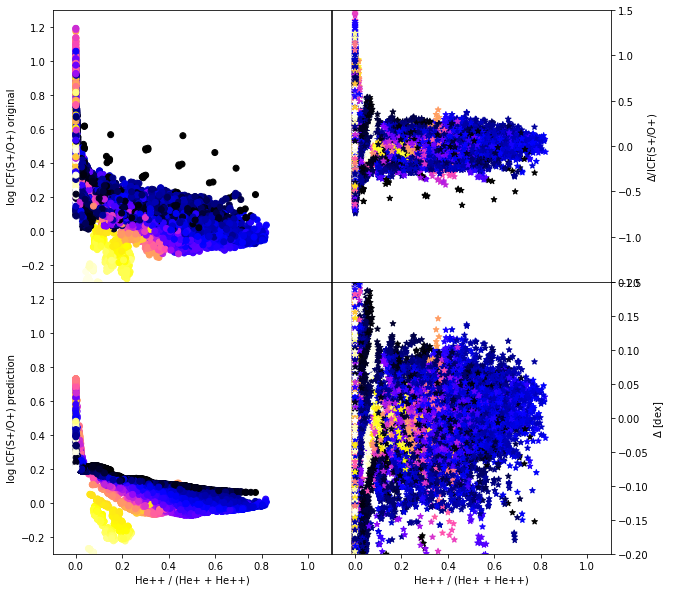

In [9]:
# S+/O+
RM = train_ICF(ref_lines = 'ao21ahe21', ICF = 'S+/O+', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False)
plot_aICF(RM, ylim=(-0.3, 1.3), xaxis='He', filename='ICF_SpOp.jpg')

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 22267, Test set size = 22267
Train data scaled. 
Test data scaled. 
Training set size = 22267, Test set size = 22267
Training set size = 22267, Test set size = 22267
Regression Model SK_ANN
Training 2 inputs for 1 outputs with 22267 data
RM trained, with 14 iterations. Score = 0.864
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10)
Training time 1.8 s.
Predicting from 2 inputs to 1 outputs using 22267 data in 0.04 secs.
(22267,) (22267,) (22267,)
SCORES = ANN: 2.38e-04, DIMS: 7.67e-04


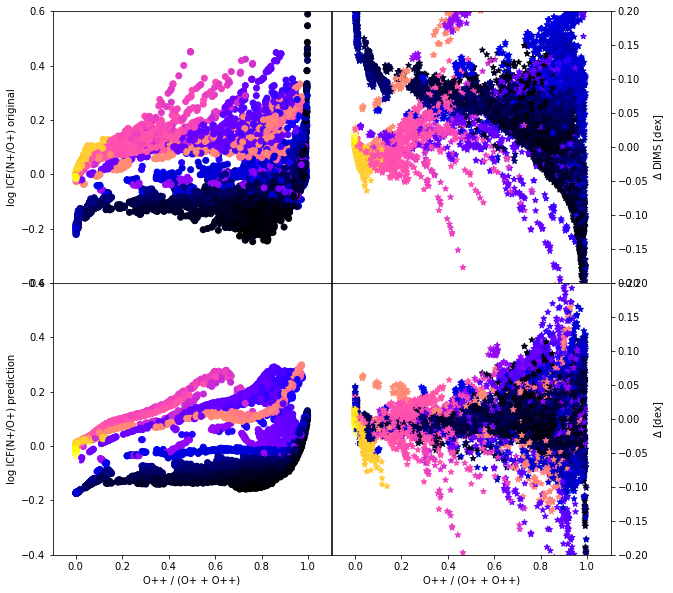

In [10]:
# N+/O+
RM = train_ICF(ref_lines = 'ao21lahe21', ICF = 'N+/O+', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False)
plot_aICF(RM, ylim=(-0.4, 0.6), xaxis='O')

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 8906, Test set size = 35628
Discretizing column 0 on 50 bins
Discretizing column 0 on 50 bins
Train data scaled. 
Test data scaled. 
Training set size = 8906, Test set size = 35628
Training set size = 8906, Test set size = 35628
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
Total params: 18,0

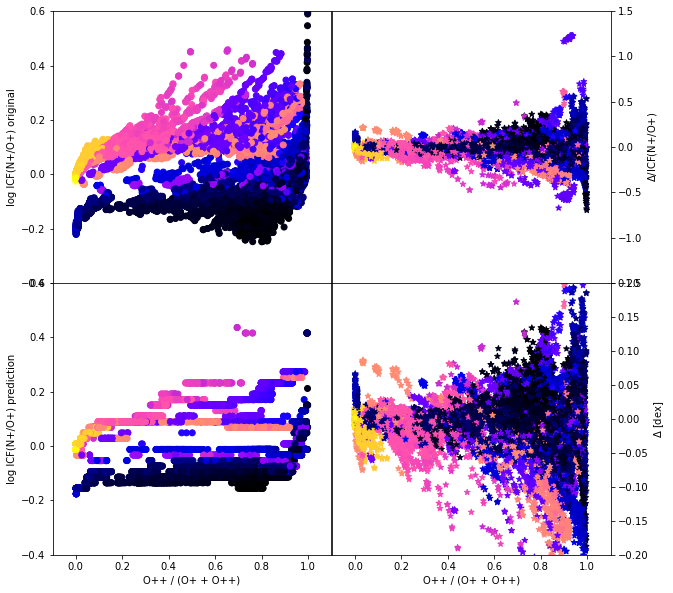

In [39]:
# N+/O+
RM = train_ICF(ref_lines = 'ao21lahe21', ICF = 'N+/O+', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False, 
               RM_type='K_ANN_Dis', y_vects=np.linspace(-0.4, 0.6, 50), reduce_by='max', epochs=100)
plot_aICF(RM, ylim=(-0.4, 0.6), xaxis='O')

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 8906, Test set size = 35628
Discretizing column 0 on 50 bins
Discretizing column 0 on 50 bins
Train data scaled. 
Test data scaled. 
Training set size = 8906, Test set size = 35628
Training set size = 8906, Test set size = 35628
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
Total params: 18,0

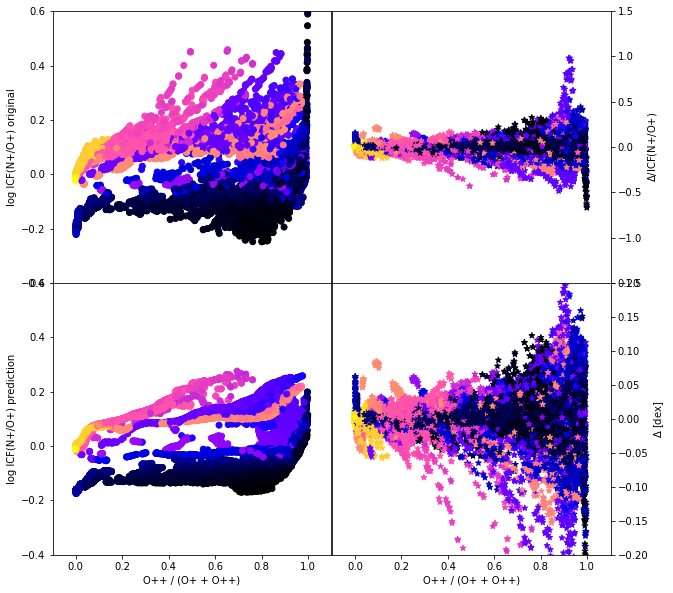

In [40]:
# N+/O+
RM = train_ICF(ref_lines = 'ao21lahe21', ICF = 'N+/O+', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False, 
               RM_type='K_ANN_Dis', y_vects=np.linspace(-0.4, 0.6, 50), reduce_by='mean', epochs=100)
plot_aICF(RM, ylim=(-0.4, 0.6), xaxis='O')

0.82631755

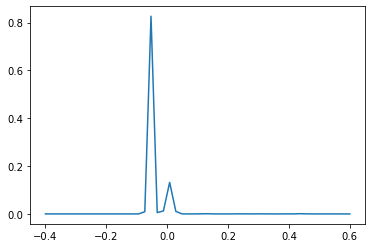

In [41]:
i = 348
plt.plot(RM.y_vects, RM.pred_norm[i,:])
alpha = np.max(RM.pred_norm, 1)
alpha[i]

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 35627, Test set size = 8907
Train data scaled. 
Test data scaled. 
Training set size = 35627, Test set size = 8907
Training set size = 35627, Test set size = 8907
Regression Model SK_ANN
Training 3 inputs for 1 outputs with 35627 data
RM trained, with 920 iterations. Score = 0.964
MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 50), max_iter=20000,
             random_state=10, solver='lbfgs', tol=1e-08)
Training time 119.9 s.
Predicting from 3 inputs to 1 outputs using 8907 data in 0.02 secs.
(8907,) (8907,) (8907,)
SCORES = ANN: 1.64e-02, DIMS: 1.08e-01


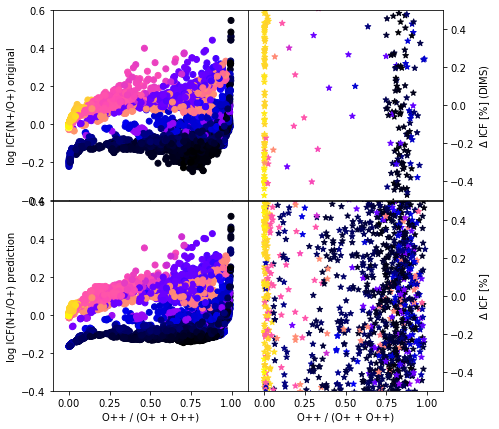

In [17]:
# N+/O+
RM = train_ICF(ref_lines = 'ao21lahe21as21', ICF = 'N+/O+', hidden_layer_sizes=(50,50), 
               scaling=True, use_log=False, tol=1e-8, solver='lbfgs', activation='tanh', 
               max_iter=20000, split_ratio=0.2)
plot_aICF(RM, ylim=(-0.4, 0.6), xaxis='O', dylim=(-.5, .5), filename='Compare_ICF_2.png')

(8907,) (8907,) (8907,)
SCORES = ANN: 1.64e-02, DIMS: 1.08e-01


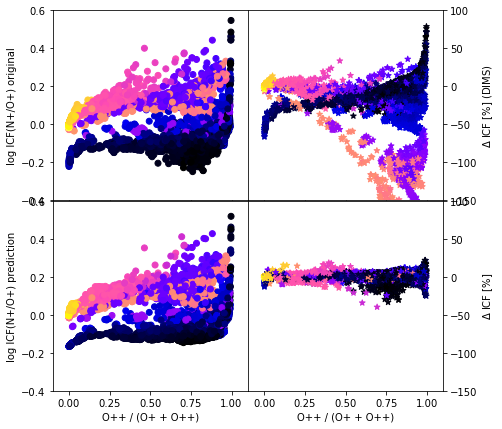

In [18]:
plot_aICF(RM, ylim=(-0.4, 0.6), xaxis='O', dylim=(-150, 100), filename='Compare_ICF_2.png')

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 22267, Test set size = 22267
Train data scaled. 
Test data scaled. 
Training set size = 22267, Test set size = 22267
Training set size = 22267, Test set size = 22267
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 15,501
Trainable params: 15,501
Non-trainable params: 0
___________

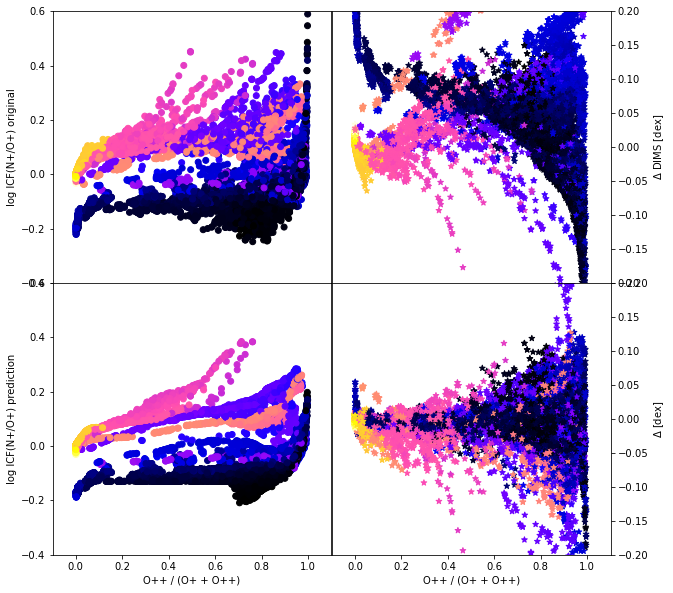

In [11]:
# N+/O+
RM = train_ICF(ref_lines = 'ao21lahe21', ICF = 'N+/O+', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False, 
               RM_type='K_ANN', epochs=100)
plot_aICF(RM, ylim=(-0.4, 0.6), xaxis='O')

In [55]:
# N+/O+
RM = train_ICF(ref_lines = 'ao21lahe21', ICF = 'N+/O+', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False,
               RM_type='K_ANN', dropout=0.1, epochs=100)
plot_aICF(RM, ylim=(-0.4, 0.6), xaxis='O')

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 8906, Test set size = 35628
Train data scaled. 
Test data scaled. 
Training set size = 8906, Test set size = 35628
Training set size = 8906, Test set size = 35628
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)   

ValueError: in user code:

    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/christophemorisset/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 100 but received input with shape (None, 2)


Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 8906, Test set size = 35628
Train data scaled. 
Test data scaled. 
Training set size = 8906, Test set size = 35628
Training set size = 8906, Test set size = 35628
Regression Model SK_ANN
Training 2 inputs for 1 outputs with 8906 data
RM trained, with 103 iterations. Score = 0.987
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10, tol=1e-08)
Training time 5.6 s.
Predicting from 2 inputs to 1 outputs using 35628 data in 0.06 secs.
(35628,) (35628,) (35628,)


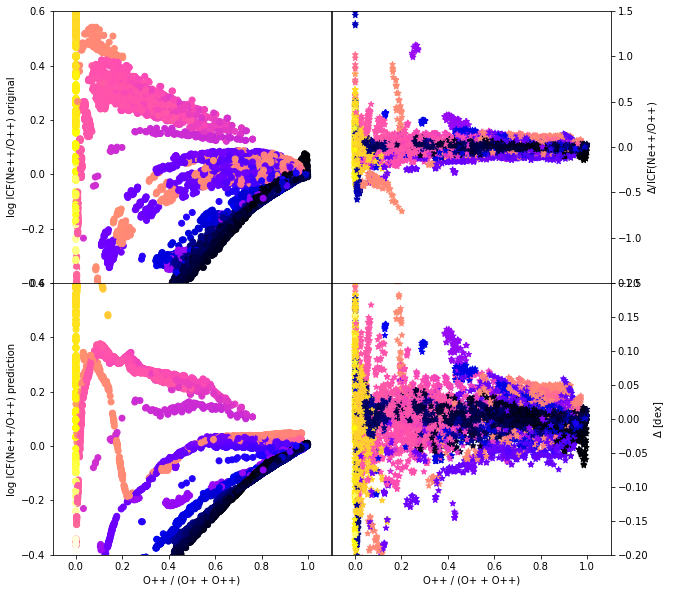

In [46]:
# Ne++/O++
RM = train_ICF(ref_lines = 'ao21lahe21', ICF = 'Ne++/O++', hidden_layer_sizes=(100, 100, 50), tol=1e-8, scaling=True, use_log=False)
plot_aICF(RM, ylim=(-0.4, 0.6), xaxis='O')

In [ ]:
# Ne++/O++
RM = train_ICF(ref_lines = 'ao21lahe21', ICF = 'Ne++/O++', hidden_layer_sizes=(100, 100, 50), tol=1e-8, scaling=True, use_log=False)
plot_aICF(RM, ylim=(-0.4, 0.6), xaxis='O')

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 22267, Test set size = 22267
Train data scaled. 
Test data scaled. 
Training set size = 22267, Test set size = 22267
Training set size = 22267, Test set size = 22267
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 15,501
Trainable params: 15,501
Non-trainable params: 0
___________

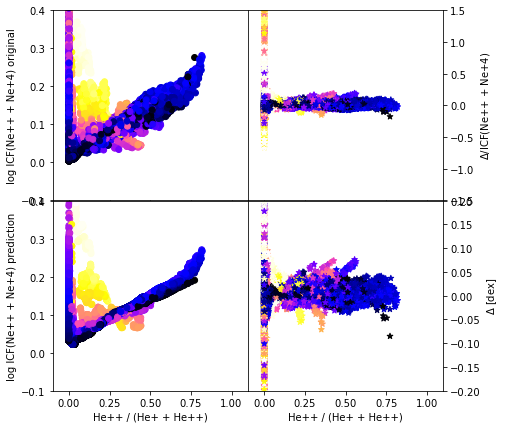

In [16]:
# Ne++ + Ne4+
RM = train_ICF(ref_lines = 'ao21ahe21', ICF = 'Ne++ + Ne+4', hidden_layer_sizes=(100, 100, 50), 
               scaling=True, use_log=False, RM_type='K_ANN', epochs=100)
plot_aICF(RM, ylim=(-0.1, 0.4), xaxis='He')

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 8906, Test set size = 35628
Train data scaled. 
Test data scaled. 
Training set size = 8906, Test set size = 35628
Training set size = 8906, Test set size = 35628
Regression Model SK_ANN
Training 2 inputs for 1 outputs with 8906 data
RM trained, with 22 iterations. Score = 0.783
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10)
Training time 1.4 s.
Predicting from 2 inputs to 1 outputs using 35628 data in 0.08 secs.
(35628,) (35628,) (35628,)


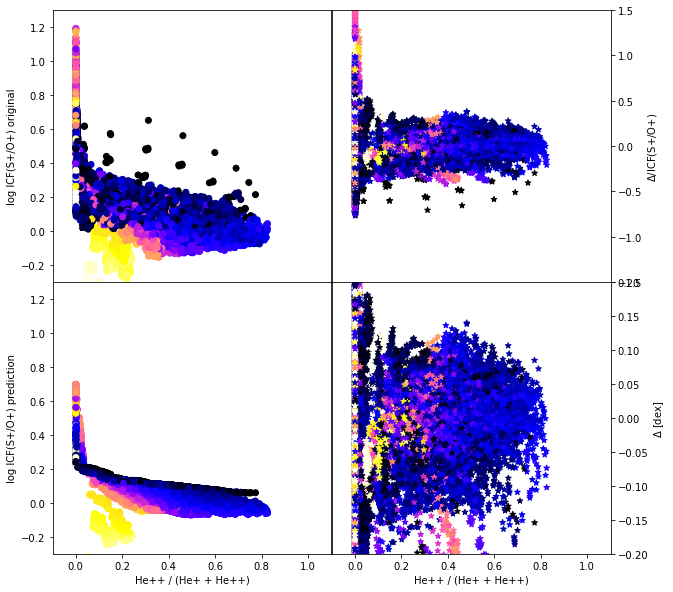

In [48]:
# S+/O+
RM = train_ICF(ref_lines = 'ao21ahe21', ICF = 'S+/O+', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False)
plot_aICF(RM, ylim=(-0.3, 1.3), xaxis='He', filename='ICF_SpOp.jpg')

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 8906, Test set size = 35628
Train data scaled. 
Test data scaled. 
Training set size = 8906, Test set size = 35628
Training set size = 8906, Test set size = 35628
Regression Model SK_ANN
Training 2 inputs for 1 outputs with 8906 data
RM trained, with 18 iterations. Score = 0.986
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10)
Training time 1.1 s.
Predicting from 2 inputs to 1 outputs using 35628 data in 0.08 secs.
(35628,) (35628,) (35628,)


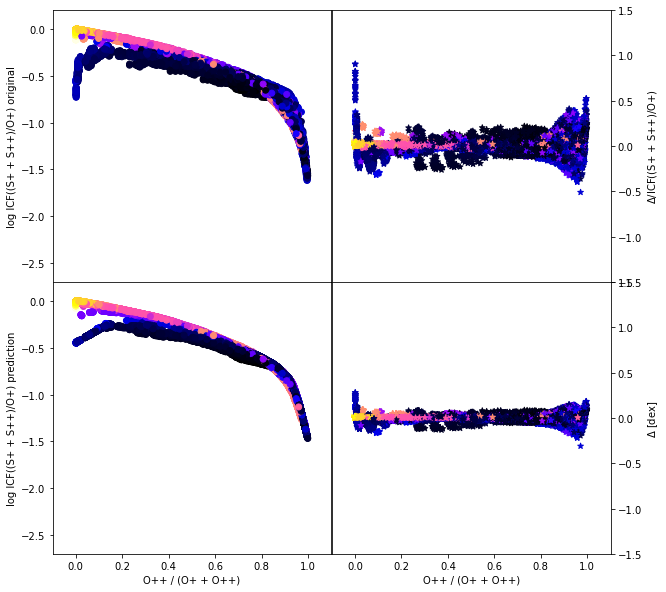

In [49]:
# (S+ + S++)/O+
RM = train_ICF(ref_lines = 'ao21lahe21', ICF = '(S+ + S++)/O+', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False)
plot_aICF(RM, ylim=(-2.7, 0.2), xaxis='O', dylim=(-1.5, 1.5))

<ipython-input-5-90c0a31ddb93>:50: RuntimeWarning: invalid value encountered in log10
  y_train = np.log10((selection[:,0] + selection[:,1])/selection[:,2])


Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 8641, Test set size = 34564
Train data scaled. 
Test data scaled. 
Training set size = 8641, Test set size = 34564
Training set size = 8641, Test set size = 34564
Regression Model SK_ANN
Training 2 inputs for 1 outputs with 8641 data
RM trained, with 62 iterations. Score = 0.972
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10)
Training time 3.5 s.
Predicting from 2 inputs to 1 outputs using 34564 data in 0.06 secs.
(34564,) (34564,) (34564,)


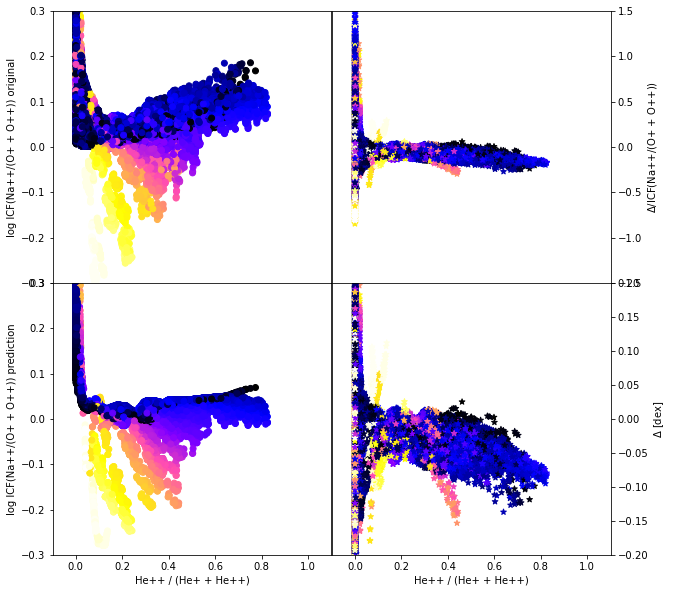

In [50]:
# Na++/(O+ + O++)
RM = train_ICF(ref_lines = 'ao21ahe21', ICF = 'Na++/(O+ + O++)', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False)
plot_aICF(RM, ylim=(-0.3, .3), xaxis='He')

Instantiation. V 0.15
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 783, Test set size = 3133
Train data scaled.
Test data scaled.
Training set size = 783, Test set size = 3133
Training set size = 783, Test set size = 3133
Regression Model SK_ANN
Training 2 inputs for 1 outputs with 783 data
RM trained, with 96 iterations. Score = 0.979
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=10, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 0.5 s.
Predicting from 2 inputs to 1 outputs using 3133 data in 0.01 secs.


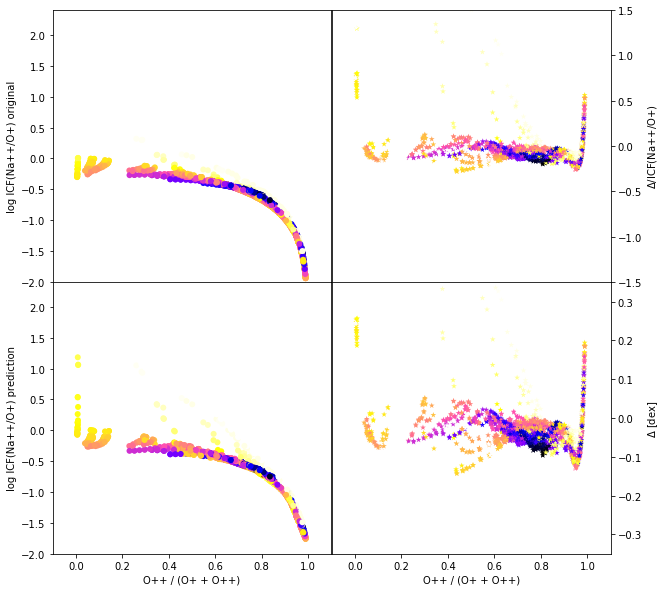

In [21]:
# Na++/(O+ )
RM = train_ICF(ref_lines = 'ao21ahe21', ICF = 'Na++/O+', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False)
plot_aICF(RM, ylim=(-2, 2.4), xaxis='O', dylim=(-0.35, 0.35))

/home/morisset/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide


Instantiation. V 0.15
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 780, Test set size = 3120
Train data scaled.
Test data scaled.
Training set size = 780, Test set size = 3120
Training set size = 780, Test set size = 3120
Regression Model SK_ANN
Training 2 inputs for 1 outputs with 780 data
RM trained, with 140 iterations. Score = 0.970
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=10, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 0.7 s.
Predicting from 2 inputs to 1 outputs using 3120 data in 0.01 secs.


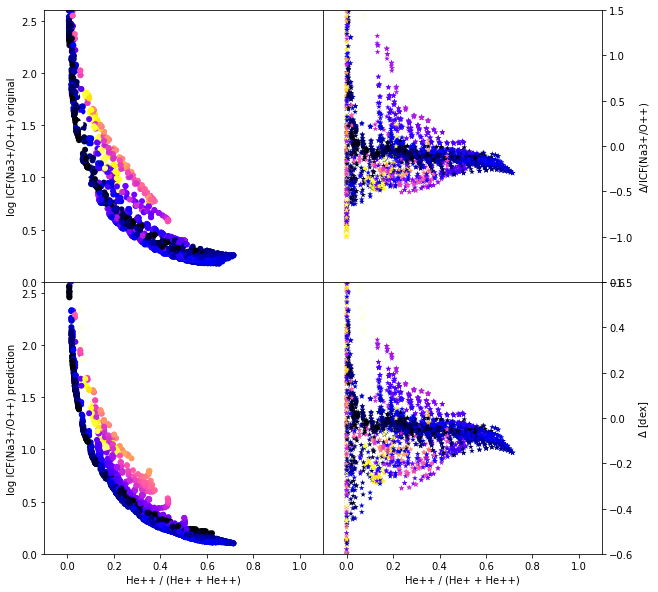

In [22]:
# Na3++/(O++ )
RM = train_ICF(ref_lines = 'ao21ahe21', ICF = 'Na3+/O++', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False)
plot_aICF(RM, ylim=(-0, 2.6), xaxis='He', dylim=(-0.6, 0.6))

Instantiation. V 0.15
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 783, Test set size = 3133
Train data scaled.
Test data scaled.
Training set size = 783, Test set size = 3133
Training set size = 783, Test set size = 3133
Regression Model SK_ANN
Training 2 inputs for 1 outputs with 783 data
RM trained, with 151 iterations. Score = 0.815
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=10, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 0.8 s.
Predicting from 2 inputs to 1 outputs using 3133 data in 0.01 secs.


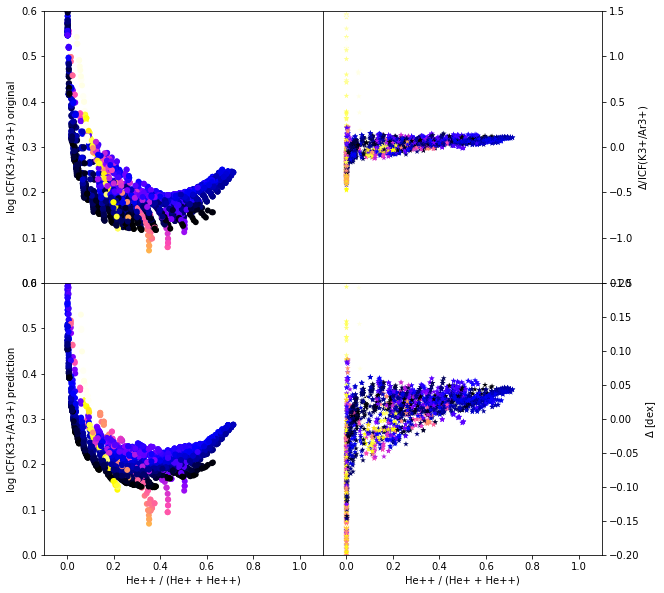

In [23]:
# K3+/Ar3+
RM = train_ICF(ref_lines = 'ao21ahe21', ICF = 'K3+/Ar3+', hidden_layer_sizes=(100, 100, 50), scaling=True, use_log=False)
plot_aICF(RM, ylim=(-0, 0.6), xaxis='He')

## Now we look for ICFs based on emission line ratio, not ionic fractions

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 22267, Test set size = 22267
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 22267, Test set size = 22267
Training set size = 22267, Test set size = 22267
Regression Model SK_ANN
Training 3 inputs for 1 outputs with 22267 data
RM trained, with 15 iterations. Score = 0.856
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10)
Training time 2.1 s.
Predicting from 3 inputs to 1 outputs using 22267 data in 0.04 secs.


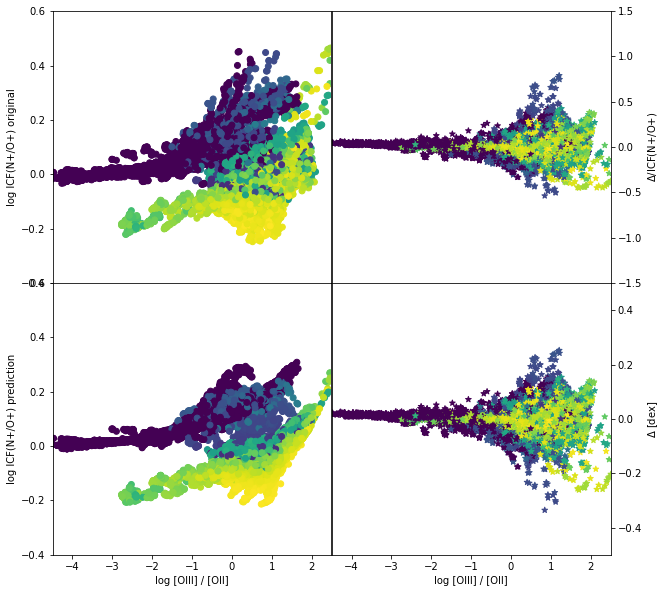

In [66]:
# The following is to illustrate how a trained ANN can determine ICF(N+)/ICF(O+) from only [OIII]/[OII], HeI/Hb and HeII/Hb.
# This is not very good. Do not forget that with only these lines, the ionic abundances O+/H+ etc can NOT be determined.
RM = train_ICF(ref_lines = 'o32he1he2_3', ICF = 'N+/O+', hidden_layer_sizes=(100, 100, 50))
plot_ICF(RM, ylim=(-0.4, 0.6))

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 22267, Test set size = 22267
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 22267, Test set size = 22267
Training set size = 22267, Test set size = 22267
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 22267 data
RM trained, with 13 iterations. Score = 0.886
MLPRegressor(hidden_layer_sizes=(100, 100, 10), random_state=10)
Training time 1.8 s.
Predicting from 5 inputs to 1 outputs using 22267 data in 0.03 secs.


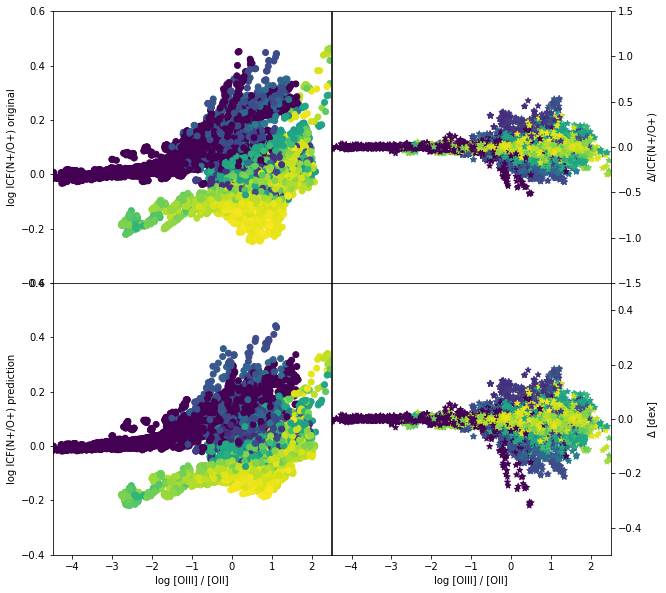

In [67]:
# Now we are using [OIII]4363/5007 and [NII] 5755/6584 in addition to the previous lines.
# This allows the network to discriminate the metallicity of the region
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'N+/O+', hidden_layer_sizes=(100,100, 10))
plot_ICF(RM, ylim=(-0.4, 0.6))

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 8906, Test set size = 35628
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 8906, Test set size = 35628
Training set size = 8906, Test set size = 35628
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 721
Trainable params: 721
Non-trainable 

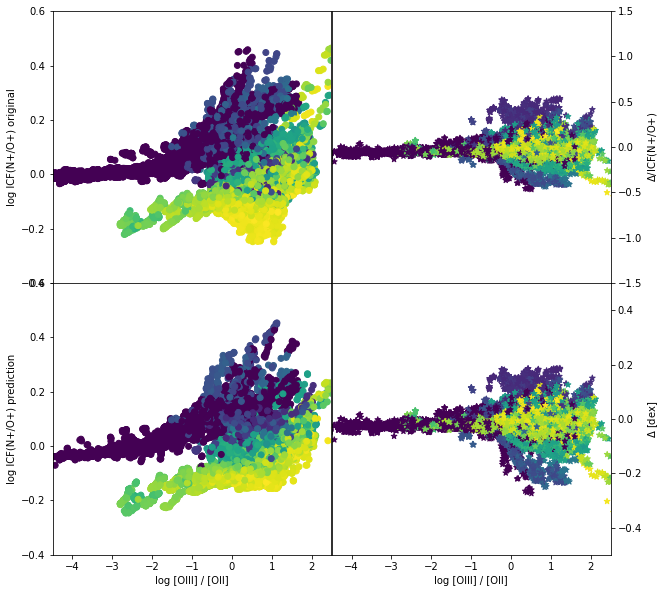

In [58]:
# Now we are using [OIII]4363/5007 and [NII] 5755/6584 in addition to the previous lines.
# This allows the network to discriminate the metallicity of the region
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'N+/O+', hidden_layer_sizes=(10,20, 20), RM_type='K_ANN', epochs=100, noise=0.1)
plot_ICF(RM, ylim=(-0.4, 0.6))

In [39]:
# Have to fix this!

# The following is to illustrate how a trained ANN can determine ICF(N+)/ICF(O+) from only [OIII]/[OII], HeI/Hb and HeII/Hb.
# This is not very good. Do not forget that with only these lines, the ionic abundances O+/H+ etc can NOT be determined.
#RM = train_ICF(ref_lines = 'o32he1he2_3', ICF = 'N+/O+', RM_type='SK_SVM',tol=0.00001, C=1, epsilon=0.1)
#plot_ICF(RM, ylim=(-0.4, 0.6))

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 22267, Test set size = 22267
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 22267, Test set size = 22267
Training set size = 22267, Test set size = 22267
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 22267 data
RM trained, with 16 iterations. Score = 0.993
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10)
Training time 2.3 s.
Predicting from 5 inputs to 1 outputs using 22267 data in 0.04 secs.


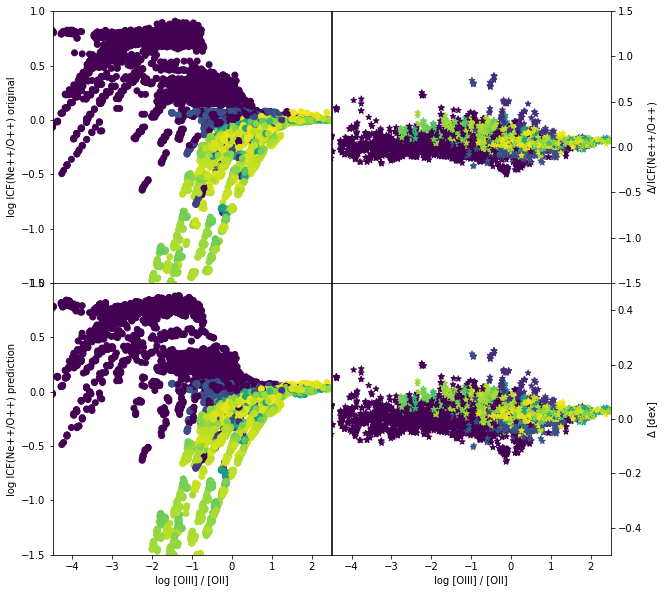

In [68]:
# ICF(Ne++) / ICF(O++)
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'Ne++/O++', hidden_layer_sizes=(100, 100, 50))
plot_ICF(RM, ylim=(-1.5, 1.))

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 22267, Test set size = 22267
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 22267, Test set size = 22267
Training set size = 22267, Test set size = 22267
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 22267 data
RM trained, with 116 iterations. Score = 0.998
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10, tol=1e-08)
Training time 16.5 s.
Predicting from 5 inputs to 1 outputs using 22267 data in 0.04 secs.


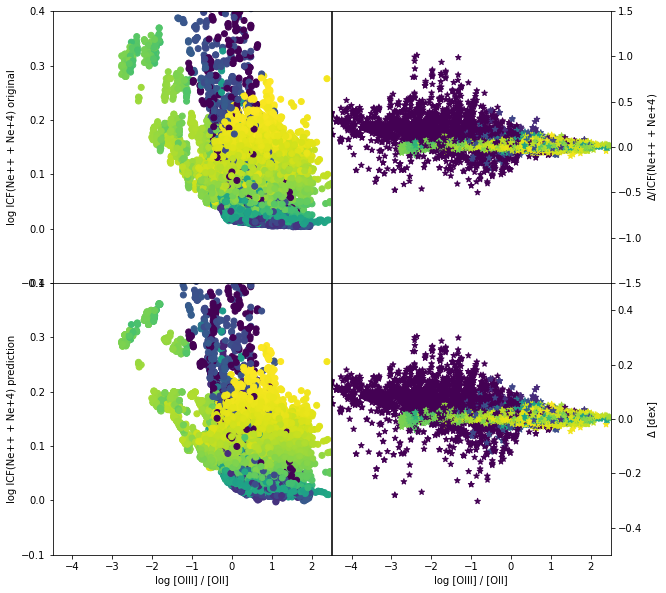

In [70]:
# ICF(Ne++ + Ne4+)
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'Ne++ + Ne+4', hidden_layer_sizes=(100, 100, 50), tol=1e-8)
plot_ICF(RM, ylim=(-0.1, 0.4))

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 22267, Test set size = 22267
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 22267, Test set size = 22267
Training set size = 22267, Test set size = 22267
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 22267 data
RM trained, with 87 iterations. Score = 0.974
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10, tol=1e-08)
Training time 12.7 s.
Predicting from 5 inputs to 1 outputs using 22267 data in 0.04 secs.


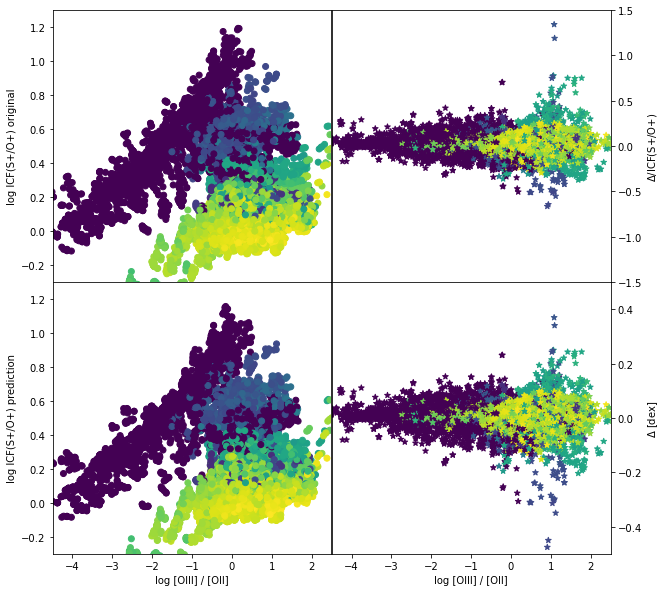

In [71]:
# ICF(S+) / ICF(O+)
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'S+/O+', hidden_layer_sizes=(100, 100, 50), tol=1e-8)
plot_ICF(RM, ylim=(-0.3, 1.3))

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 8906, Test set size = 35628
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 8906, Test set size = 35628
Training set size = 8906, Test set size = 35628
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 8906 data
RM trained, with 16 iterations. Score = 0.988
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10)
Training time 1.1 s.
Predicting from 5 inputs to 1 outputs using 35628 data in 0.07 secs.


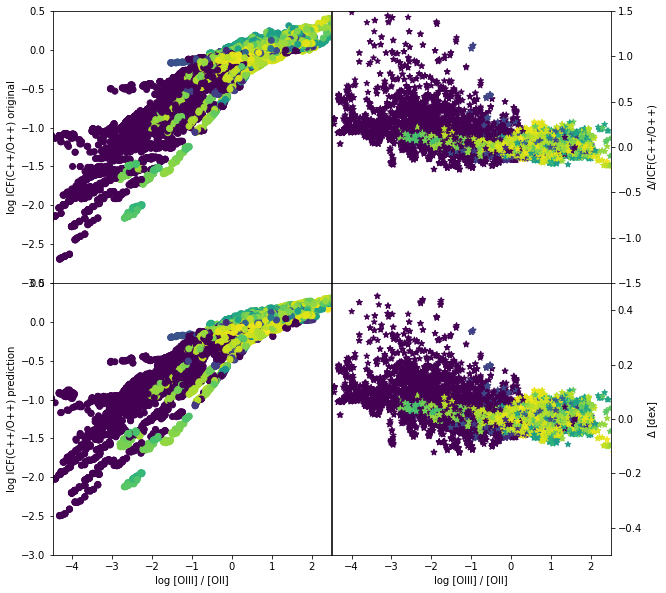

In [62]:
# ICF(C++) /  ICF(O++)
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'C++/O++', hidden_layer_sizes=(100, 100, 50))
plot_ICF(RM, ylim=(-3.0, 0.5))

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 8906, Test set size = 35628
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 8906, Test set size = 35628
Training set size = 8906, Test set size = 35628
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 8906 data
RM trained, with 26 iterations. Score = 0.977
MLPRegressor(hidden_layer_sizes=(30, 30, 30), random_state=10)
Training time 0.9 s.
Predicting from 5 inputs to 1 outputs using 35628 data in 0.03 secs.


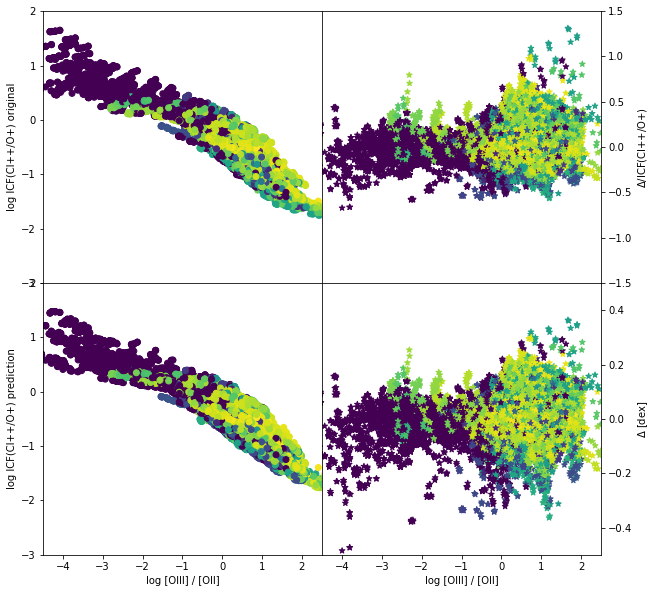

In [63]:
# ICF(Cl++) /  ICF(O+)
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'Cl++/O+', hidden_layer_sizes=(30, 30, 30))
plot_ICF(RM, ylim=(-3.0, 2))

<ipython-input-5-90c0a31ddb93>:50: RuntimeWarning: invalid value encountered in log10
  y_train = np.log10((selection[:,0] + selection[:,1])/selection[:,2])


Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 21602, Test set size = 21603
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 21602, Test set size = 21603
Training set size = 21602, Test set size = 21603
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 21602 data
RM trained, with 103 iterations. Score = 0.999
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10, tol=1e-08)
Training time 14.5 s.
Predicting from 5 inputs to 1 outputs using 21603 data in 0.04 secs.


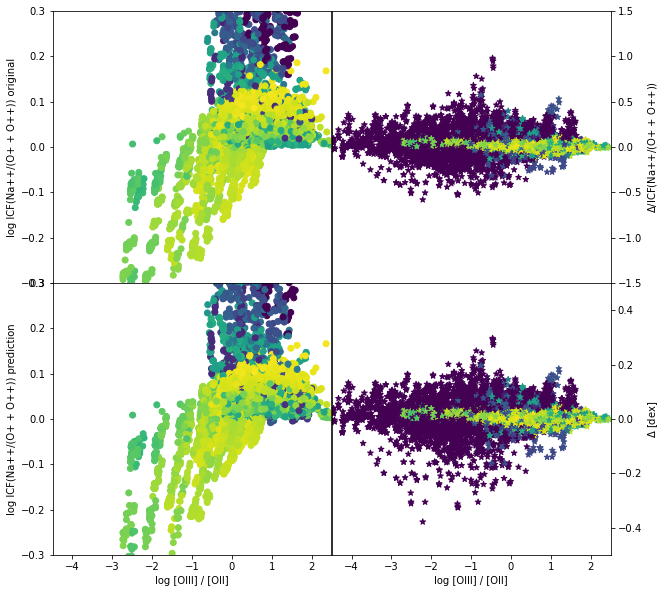

In [72]:
# Na++/(O+ + O++)
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'Na++/(O+ + O++)', hidden_layer_sizes=(100, 100, 50), tol=1e-8)
plot_ICF(RM, ylim=(-0.3, 0.3))

Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 22267, Test set size = 22267
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 22267, Test set size = 22267
Training set size = 22267, Test set size = 22267
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 22267 data
RM trained, with 14 iterations. Score = 0.985
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10)
Training time 2.1 s.
Predicting from 5 inputs to 1 outputs using 22267 data in 0.04 secs.


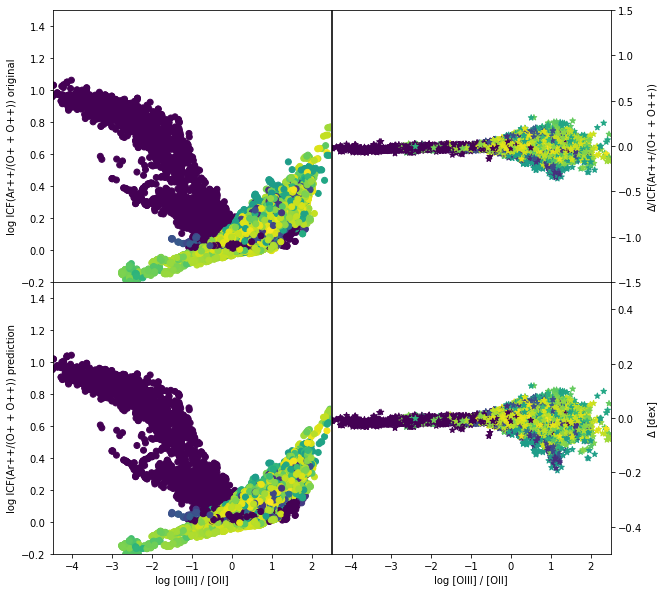

In [73]:
# Ar++/(O+ + O++)
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'Ar++/(O+ + O++)', hidden_layer_sizes=(100, 100, 50))
plot_ICF(RM, ylim=(-0.2, 1.5))

<ipython-input-5-90c0a31ddb93>:63: RuntimeWarning: invalid value encountered in log10
  y_train = np.log10(selection[:,0] / selection[:,1])


Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 21602, Test set size = 21603
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 21602, Test set size = 21603
Training set size = 21602, Test set size = 21603
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 21602 data
RM trained, with 31 iterations. Score = 0.997
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10)
Training time 4.6 s.
Predicting from 5 inputs to 1 outputs using 21603 data in 0.04 secs.


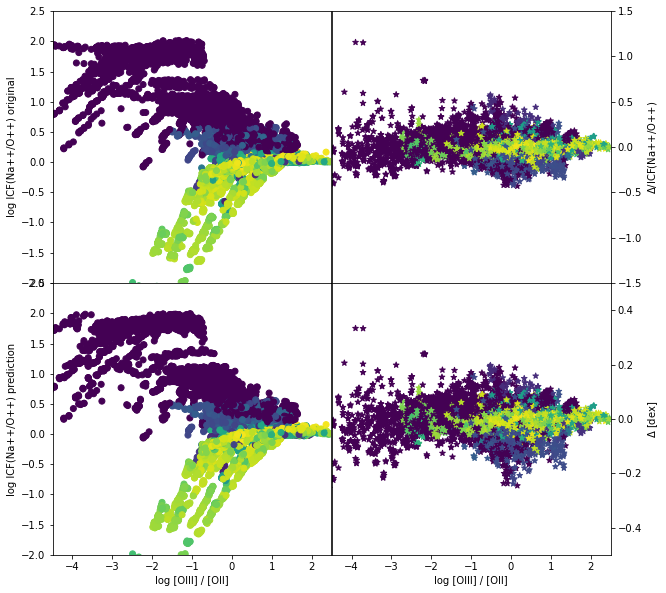

In [74]:
# Na++/O++
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'Na++/O++', hidden_layer_sizes=(100, 100, 50))
plot_ICF(RM, ylim=(-2, 2.5))

Instantiation. V 0.15
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 783, Test set size = 3133
Adding noise 0.0
Log10 applied. Train data scaled.
Log10 applied. Test data scaled.
Training set size = 783, Test set size = 3133
Training set size = 783, Test set size = 3133
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 783 data
RM trained, with 34 iterations. Score = 0.998
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=10, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 0.2 s.
Predicting from 5 inputs t

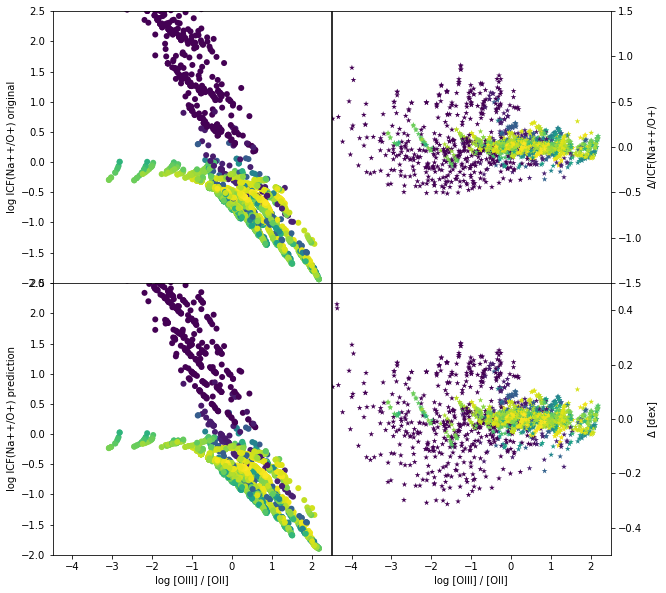

In [36]:
# Na++/O+
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'Na++/O+', hidden_layer_sizes=(100, 100, 50), noise=0.)
plot_ICF(RM, ylim=(-2, 2.5))

<ipython-input-5-90c0a31ddb93>:63: RuntimeWarning: divide by zero encountered in true_divide
  y_train = np.log10(selection[:,0] / selection[:,1])
<ipython-input-5-90c0a31ddb93>:63: RuntimeWarning: invalid value encountered in log10
  y_train = np.log10(selection[:,0] / selection[:,1])


Instantiation. V 0.17
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 21446, Test set size = 21447
Train data scaled. Log10 applied. 
Test data scaled. Log10 applied. 
Training set size = 21446, Test set size = 21447
Training set size = 21446, Test set size = 21447
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 21446 data
RM trained, with 187 iterations. Score = 0.990
MLPRegressor(hidden_layer_sizes=(100, 100, 50), random_state=10)
Training time 32.6 s.
Predicting from 5 inputs to 1 outputs using 21447 data in 0.09 secs.


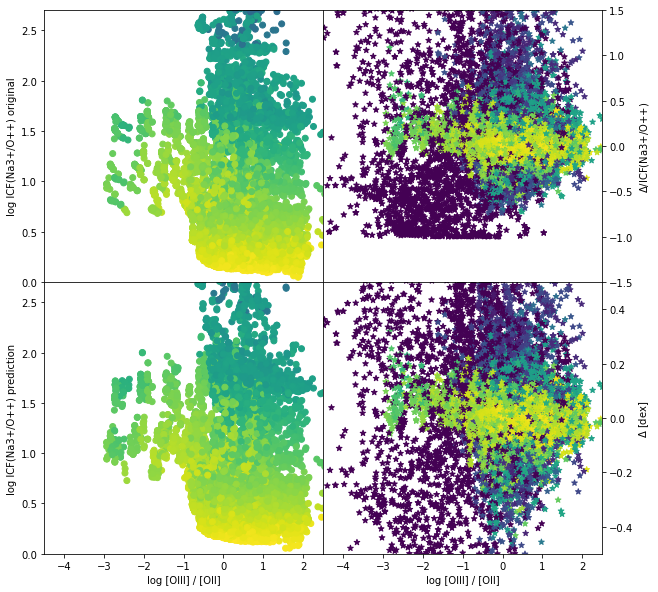

In [75]:
# Na3+/O++
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'Na3+/O++', hidden_layer_sizes=(100, 100, 50))
plot_ICF(RM, ylim=(0, 2.7))

Instantiation. V 0.15
train and test sets are obtained by splitting X_train and y_train.
input test sets are not used.
Training set size = 783, Test set size = 3133
Log10 applied. Train data scaled.
Log10 applied. Test data scaled.
Training set size = 783, Test set size = 3133
Training set size = 783, Test set size = 3133
Regression Model SK_ANN
Training 5 inputs for 1 outputs with 783 data
RM trained, with 52 iterations. Score = 0.983
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=10, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
Training time 0.3 s.
Predicting from 5 inputs to 1 outputs using

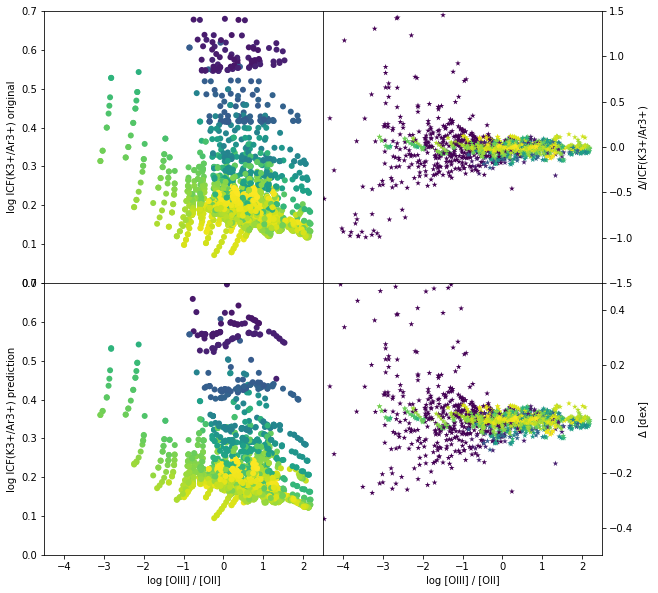

In [38]:
# K3+/Ar3+
RM = train_ICF(ref_lines = 'o32he1he2rO3rN2_5', ICF = 'K3+/Ar3+', hidden_layer_sizes=(100, 100, 50))
plot_ICF(RM, ylim=(0, 0.7))